# Retail Sales - Tarun Sirohi (Group 1)

## Importing the Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## Importing the Dataset

In [2]:
df = pd.read_csv("Group1_dataset.csv")

In [3]:
df.head()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100


In [4]:
df.tail()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
995,996,2023-05-16,CUST996,Male,62,Clothing,1,50,50
996,997,2023-11-17,CUST997,Male,52,Beauty,3,30,90
997,998,2023-10-29,CUST998,Female,23,Beauty,4,25,100
998,999,2023-12-05,CUST999,Female,36,Electronics,3,50,150
999,1000,2023-04-12,CUST1000,Male,47,Electronics,4,30,120


## Describing the Dataset

In [5]:
df.shape

(1000, 9)

In [6]:
df.isnull().sum()

Transaction ID      0
Date                0
Customer ID         0
Gender              0
Age                 0
Product Category    0
Quantity            0
Price per Unit      0
Total Amount        0
dtype: int64

# Visualisation of the Dataset

In [7]:
df.describe()

,Transaction ID,Age,Quantity,Price per Unit,Total Amount
count,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000
mean,500.500000,41.39200,2.514000,179.890000,456.000000
std,288.819436,13.68143,1.132734,189.681356,559.997632
min,1.000000,18.00000,1.000000,25.000000,25.000000
25%,250.750000,29.00000,1.000000,30.000000,60.000000
50%,500.500000,42.00000,3.000000,50.000000,135.000000
75%,750.250000,53.00000,4.000000,300.000000,900.000000
max,1000.000000,64.00000,4.000000,500.000000,2000.000000


In [8]:
df.nunique()

Transaction ID      1000
Date                 345
Customer ID         1000
Gender                 2
Age                   47
Product Category       3
Quantity               4
Price per Unit         5
Total Amount          18
dtype: int64

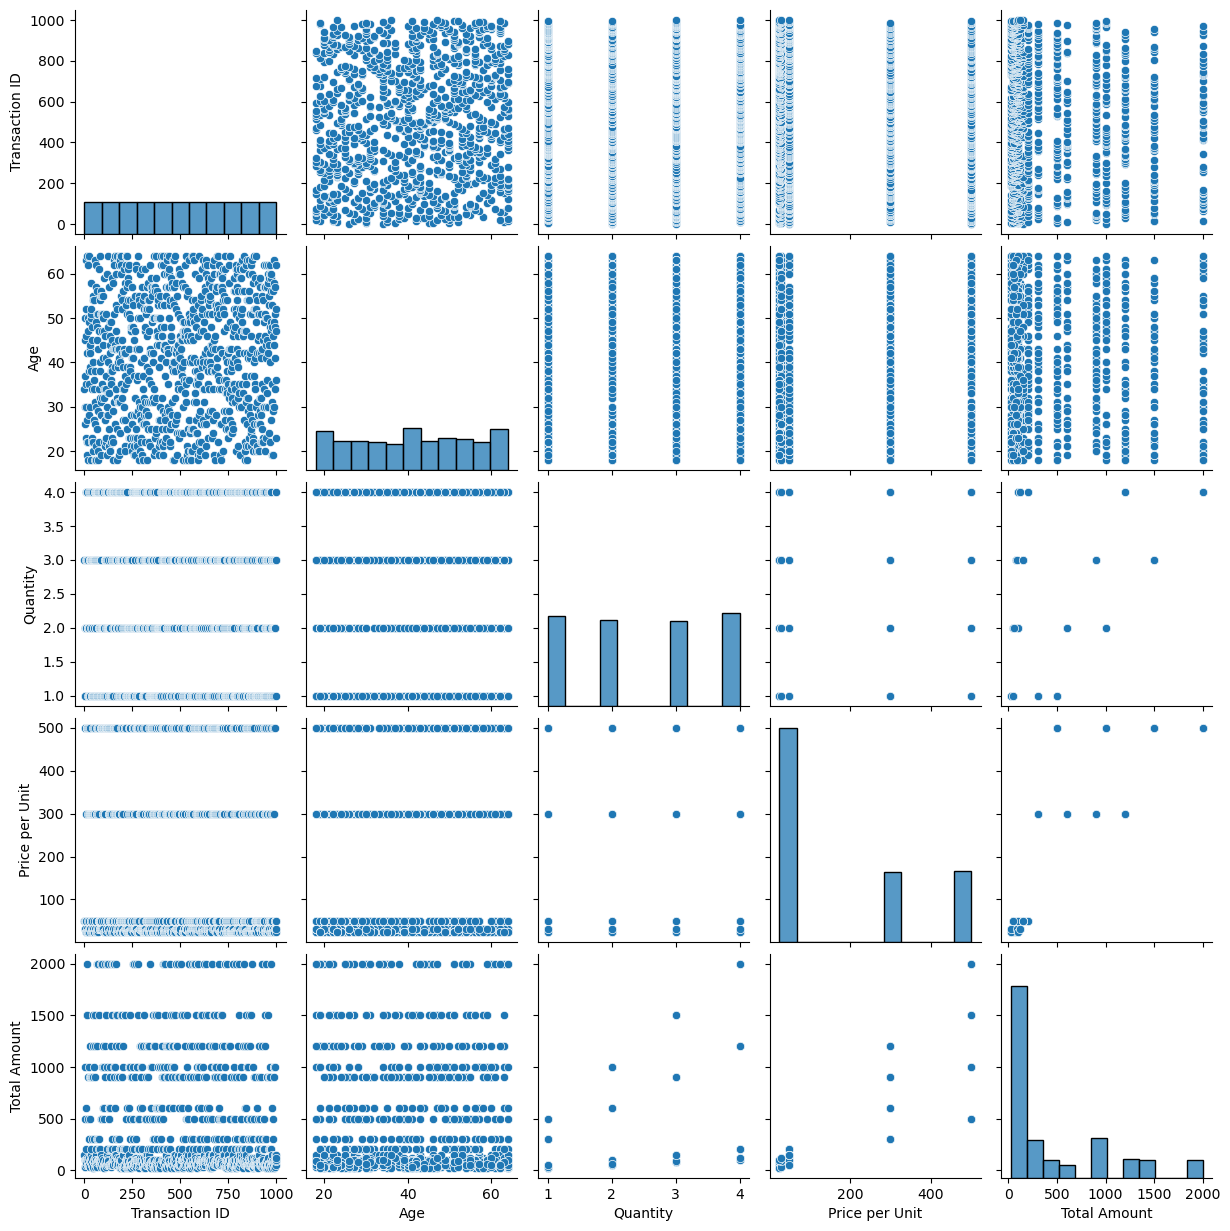

In [9]:
sns.pairplot(df)

In [10]:
#counting the products in product category
df[df['Product Category'].isin(['Clothing','Beauty','Electronics'])]['Product Category'].value_counts()

Product Category
Clothing       351
Electronics    342
Beauty         307
Name: count, dtype: int64

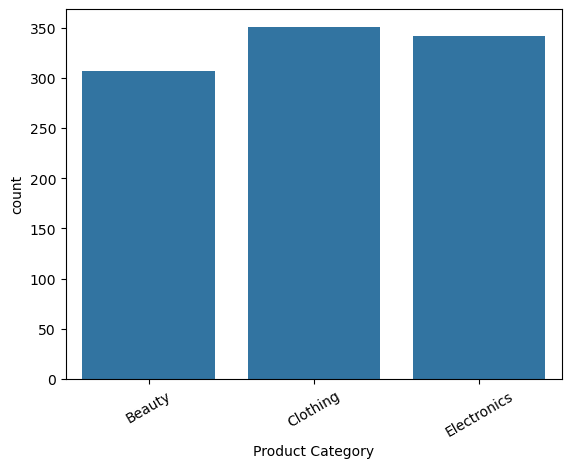

In [11]:
#count plot
sns.countplot(x=df['Product Category'])
plt.xticks(rotation=30)
plt.show()

In [12]:
#split dates into DD,MM,YYYY

df['Date'] = pd.to_datetime(df['Date'])
#adding month column and extracting month from date
df['Month'] = df['Date'].dt.month_name()
df['Month']

0      November
1      February
2       January
3           May
4           May
         ...   
995         May
996    November
997     October
998    December
999       April
Name: Month, Length: 1000, dtype: object

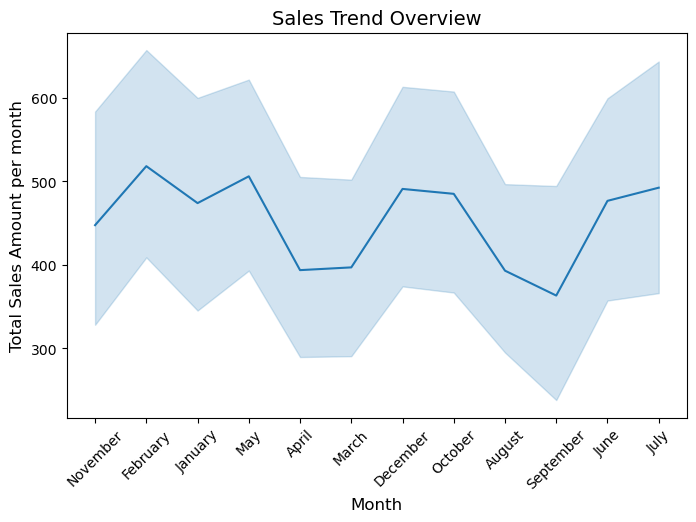

In [13]:
#sales trend overtime

plt.figure(figsize=(8,5))
sns.lineplot(x='Month', y='Total Amount', data=df)
plt.title('Sales Trend Overview', fontsize=14)
plt.xlabel('Month', fontsize=12)
plt.xticks(rotation=45)
plt.ylabel('Total Sales Amount per month', fontsize=12)
plt.show()

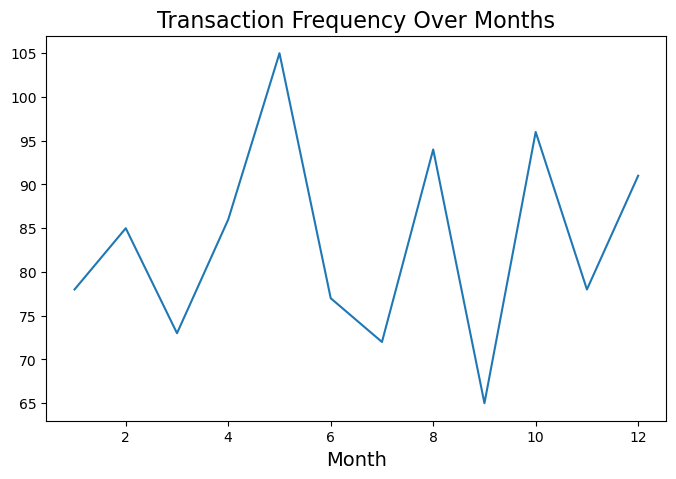

In [14]:
df['Month'] = df['Date'].dt.month
transaction_count = df.groupby('Month')['Transaction ID'].count()
plt.figure(figsize=(8,5))
sns.lineplot(x=transaction_count.index, y=transaction_count.values)
plt.title('Transaction Frequency Over Months', fontsize=16)
plt.xlabel('Month', fontsize=14)
plt.show()

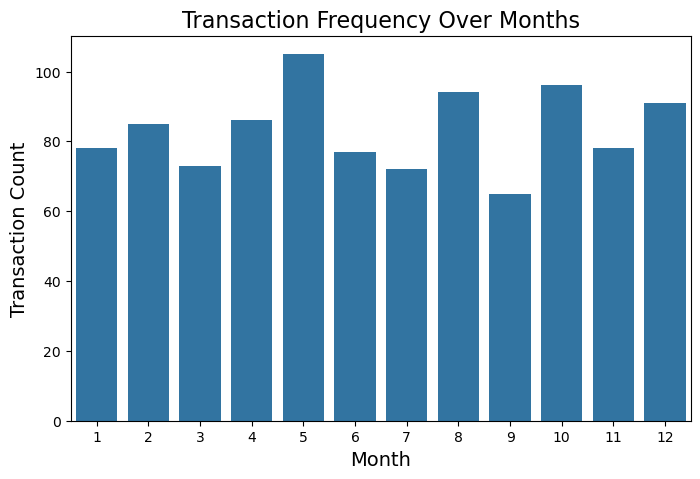

In [15]:
#transaction freq over each month

plt.figure(figsize=(8,5))
sns.barplot(x=transaction_count.index, y=transaction_count.values)
plt.title('Transaction Frequency Over Months', fontsize=16)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Transaction Count', fontsize=14)
plt.show()

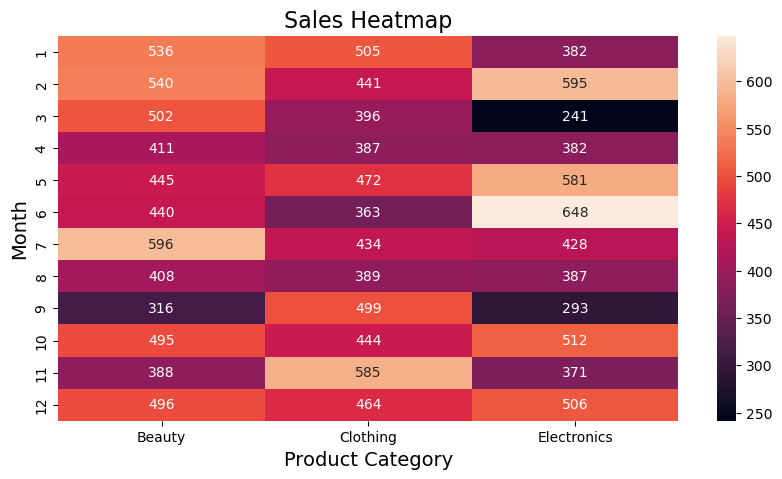

In [16]:
#sales heatmap

heatmap=df.pivot_table(index='Month', columns='Product Category', values='Total Amount')
plt.figure(figsize=(10,5))
sns.heatmap(heatmap, annot=True, fmt='.0f')
plt.title('Sales Heatmap', fontsize=16)
plt.xlabel('Product Category', fontsize=14)
plt.ylabel('Month', fontsize=14)
plt.show()

In [17]:
#Gender-male and female

df['Age'].count()

1000

In [18]:
df[df['Gender'].isin(['Male', 'Female'])]['Gender'].value_counts()

Gender
Female    510
Male      490
Name: count, dtype: int64

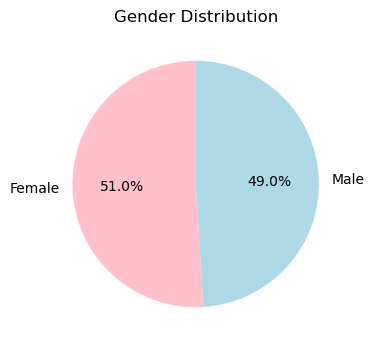

In [19]:
gender_counts={'Female':510, 'Male':490}
plt.figure(figsize=(4,4))
plt.pie(gender_counts.values(), labels = gender_counts.keys(), autopct='%1.1f%%', colors=['pink', 'lightblue'], startangle=90)
plt.title('Gender Distribution')
plt.show()

<Axes: title={'center': 'Age of Persons'}, xlabel='Age', ylabel='count'>

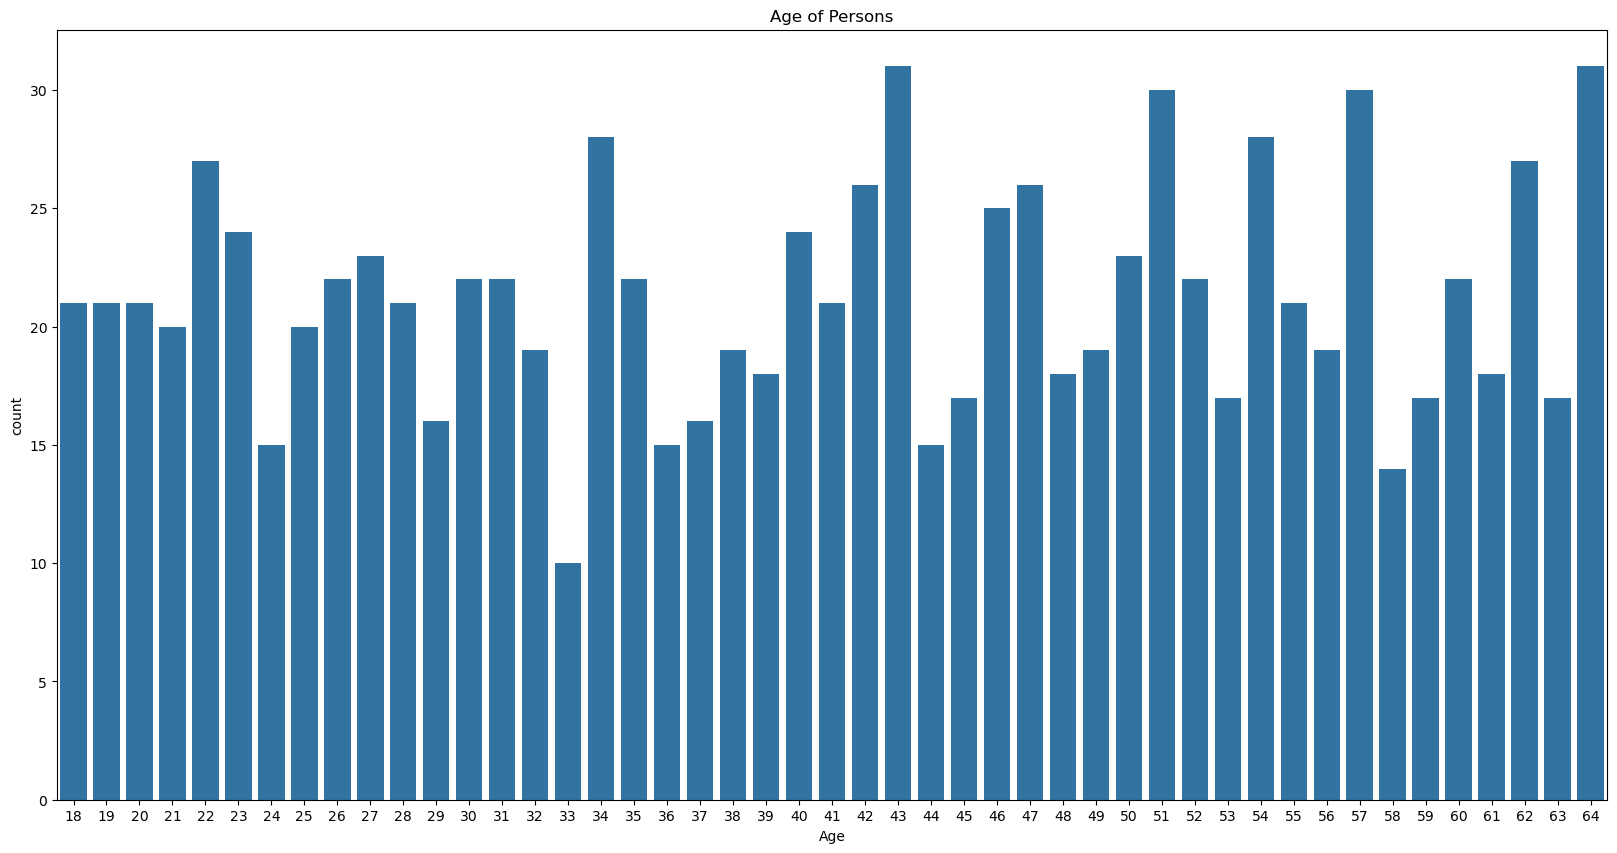

In [20]:
#histogram for count of age persons

plt.figure(figsize=(20,10))
plt.title('Age of Persons')
plt.xlabel('Age')
sns.countplot(x='Age', data=df)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Transaction ID    1000 non-null   int64         
 1   Date              1000 non-null   datetime64[ns]
 2   Customer ID       1000 non-null   object        
 3   Gender            1000 non-null   object        
 4   Age               1000 non-null   int64         
 5   Product Category  1000 non-null   object        
 6   Quantity          1000 non-null   int64         
 7   Price per Unit    1000 non-null   int64         
 8   Total Amount      1000 non-null   int64         
 9   Month             1000 non-null   int32         
dtypes: datetime64[ns](1), int32(1), int64(5), object(3)
memory usage: 74.3+ KB


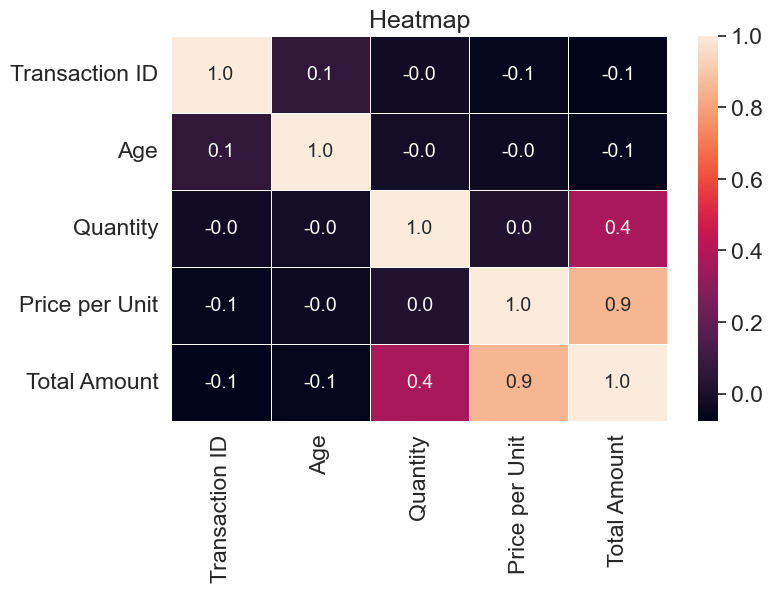

In [22]:
correlation=df[df.dtypes[df.dtypes == 'int64'].index].corr()
sns.set(font_scale=1.5)
plt.figure(figsize = (8,5))
plt.title("Heatmap", fontsize=18)
ax = sns.heatmap(correlation, annot=True, annot_kws={"size":14},fmt='.1f', linewidths=.5)

## Questions to Explore

### How does customer age and gender influence their purchasing behaviour?

In [23]:
age_bins = [18, 25, 35, 50, 100]
age_group = ['18-25', '26-35', '36-50', '50+']
df['Age Group'] = pd.cut(df['Age'], bins=age_bins, labels=age_group)
df.head()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount,Month,Age Group
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150,11,26-35
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000,2,26-35
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30,1,36-50
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500,5,36-50
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100,5,26-35


In [24]:
age_gender_summary = df.groupby(['Age Group', 'Gender'])[['Quantity', 'Total Amount']].sum().reset_index()

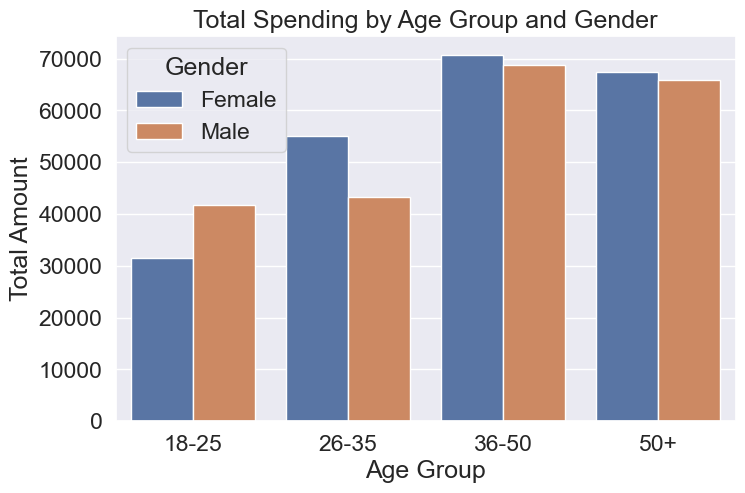

In [25]:
plt.figure(figsize=(8,5))
sns.barplot(x='Age Group', y='Total Amount', hue='Gender', data=age_gender_summary)
plt.title('Total Spending by Age Group and Gender')
plt.show()

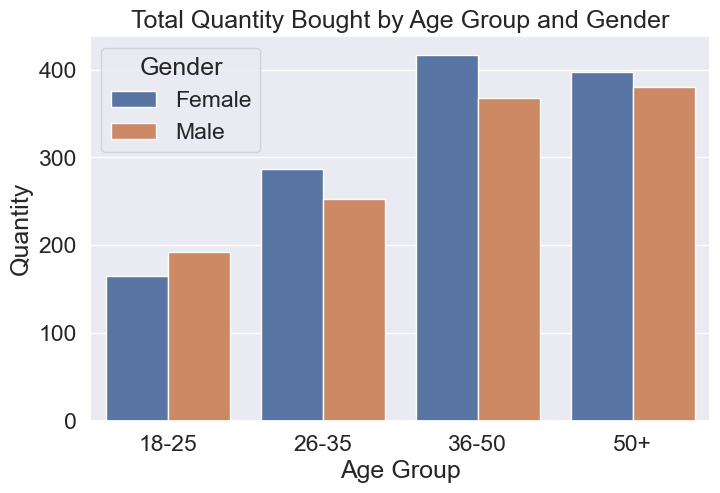

In [26]:
plt.figure(figsize=(8,5))
sns.barplot(x='Age Group', y='Quantity', hue='Gender', data=age_gender_summary)
plt.title('Total Quantity Bought by Age Group and Gender')
plt.show()

### Are there discernible patterns in sales across different time periods?

In [27]:
df['Date'] = pd.to_datetime(df['Date'])

In [28]:
df['Month'] = df['Date'].dt.month_name()  
df['Weekday'] = df['Date'].dt.day_name() 
df['Day'] = df['Date'].dt.day   

In [29]:
monthly_sales = df.groupby('Month')['Total Amount'].sum().reindex([
    'January','February','March','April','May','June','July','August','September','October','November','December'
])

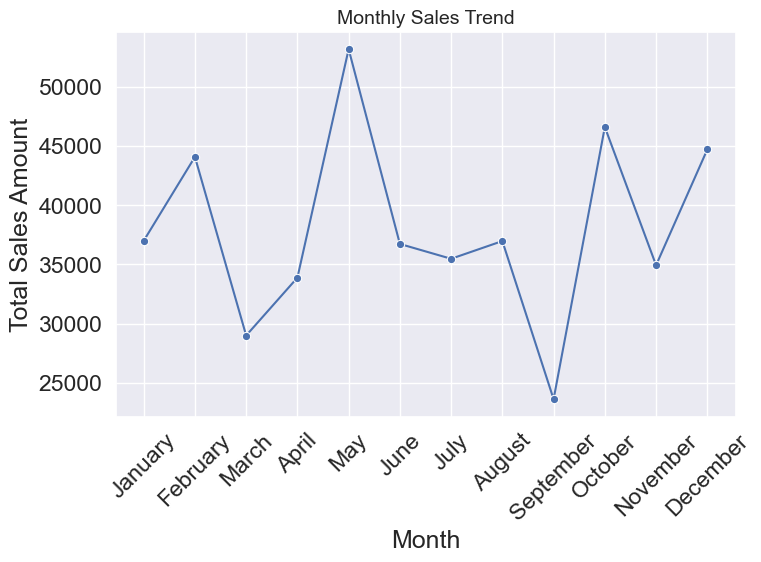

In [30]:
plt.figure(figsize=(8,5))
sns.lineplot(x=monthly_sales.index, y=monthly_sales.values, marker='o')
plt.title('Monthly Sales Trend', fontsize=14)
plt.xlabel('Month')
plt.ylabel('Total Sales Amount')
plt.xticks(rotation=45)
plt.show()

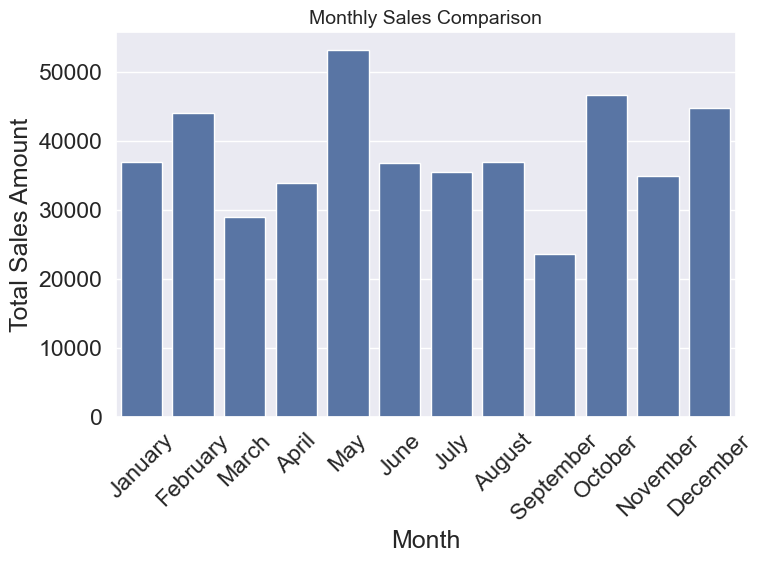

In [31]:
plt.figure(figsize=(8,5))
sns.barplot(x=monthly_sales.index, y=monthly_sales.values)
plt.title('Monthly Sales Comparison', fontsize=14)
plt.xlabel('Month')
plt.ylabel('Total Sales Amount')
plt.xticks(rotation=45)
plt.show()

### Which product categories hold the highest appeal among customers?

In [32]:
#Grouping data by Product Category and summarizing it by quantity and total amount
df.groupby('Product Category')[['Quantity', 'Total Amount']].sum()

,Quantity,Total Amount
Product Category,,
Beauty,771,143515
Clothing,894,155580
Electronics,849,156905


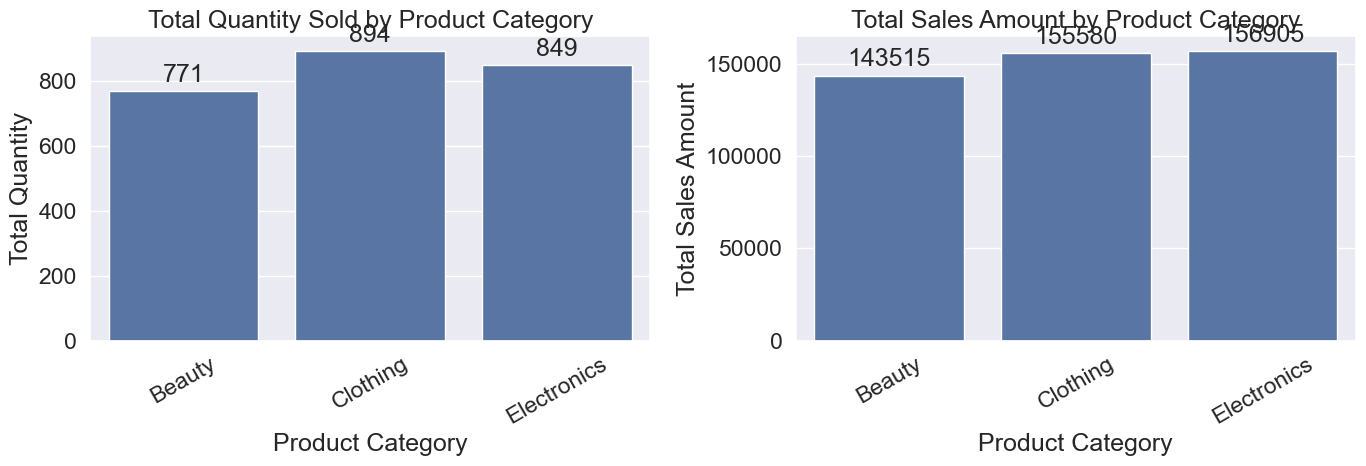

In [33]:
#grouping data
category_summary = df.groupby('Product Category')[['Quantity', 'Total Amount']].sum()

#plotting
fig, ax = plt.subplots(1, 2, figsize=(14, 5))

#bar plot for quantity
bars1 = sns.barplot(x=category_summary.index, y=category_summary['Quantity'], ax=ax[0])
ax[0].set_title('Total Quantity Sold by Product Category')
ax[0].set_xlabel('Product Category')
ax[0].set_ylabel('Total Quantity')
ax[0].tick_params(axis='x', rotation=30)

for container in bars1.containers:
    bars1.bar_label(container, fmt='%.0f', label_type='edge', padding=3)

#bar plot for total amount
bars2= sns.barplot(x=category_summary.index, y=category_summary['Total Amount'], ax=ax[1])
ax[1].set_title('Total Sales Amount by Product Category')
ax[1].set_xlabel('Product Category')
ax[1].set_ylabel('Total Sales Amount')
ax[1].tick_params(axis='x', rotation=30)


for container in bars2.containers:
    bars2.bar_label(container, fmt='%.0f', label_type='edge', padding=3)

plt.tight_layout()
plt.show()

### Are there distinct purchasing behaviours based on the number of items bought per transaction?

In [34]:
quantity_summary = df.groupby('Quantity')['Total Amount'].agg(['count', 'mean', 'sum'])
quantity_summary

,count,mean,sum
Quantity,,,
1,253,177.094862,44805
2,243,333.539095,81050
3,241,598.692946,144285
4,263,706.692015,185860


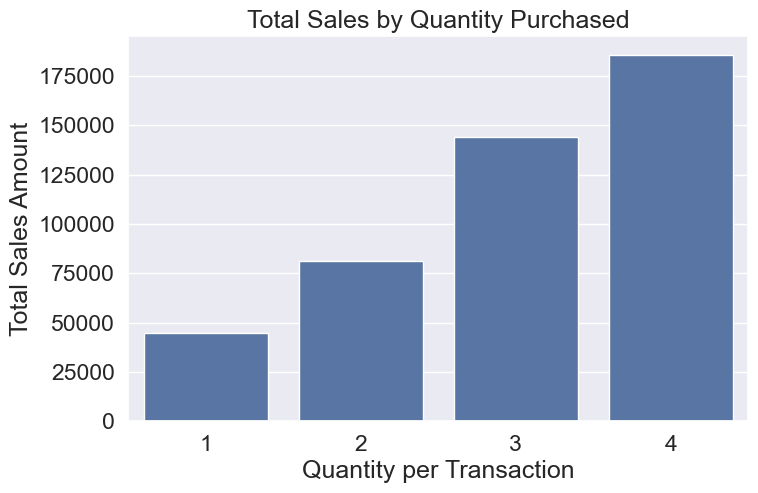

In [35]:
plt.figure(figsize=(8,5))
sns.barplot(x=quantity_summary.index, y=quantity_summary['sum'])
plt.title('Total Sales by Quantity Purchased')
plt.xlabel('Quantity per Transaction')
plt.ylabel('Total Sales Amount')
plt.show()

### What insights can be gleaned from the distribution of product prices within each category?

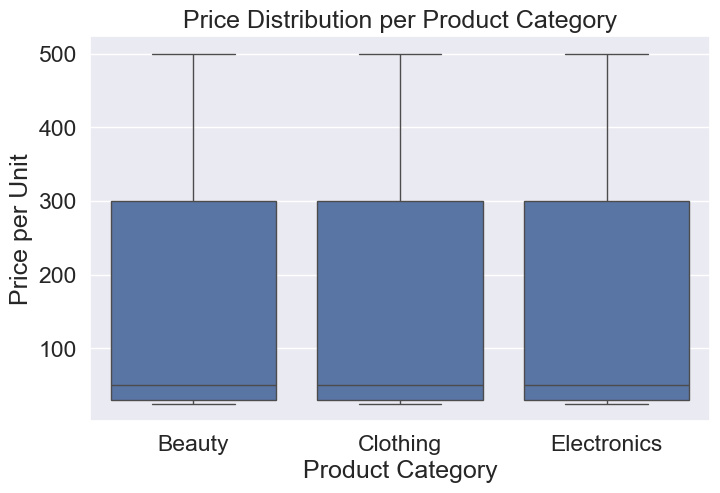

In [36]:
plt.figure(figsize=(8,5))
sns.boxplot(x='Product Category', y='Price per Unit', data=df)
plt.title('Price Distribution per Product Category')
plt.xlabel('Product Category')
plt.ylabel('Price per Unit')
plt.show()

### Which time periods (daily, weekly, monthly, seasonal) generate the highest revenue?

In [37]:
df['Date'] = pd.to_datetime(df['Date'])

df['Day'] = df['Date'].dt.day                 
df['Week'] = df['Date'].dt.isocalendar().week 
df['Month'] = df['Date'].dt.month_name()      

def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Autumn'

df['Season'] = df['Date'].dt.month.apply(get_season)

In [38]:
daily_revenue = df.groupby('Date')['Total Amount'].sum()
weekly_revenue = df.groupby('Week')['Total Amount'].sum()
monthly_revenue = df.groupby('Month')['Total Amount'].sum()
season_revenue = df.groupby('Season')['Total Amount'].sum()

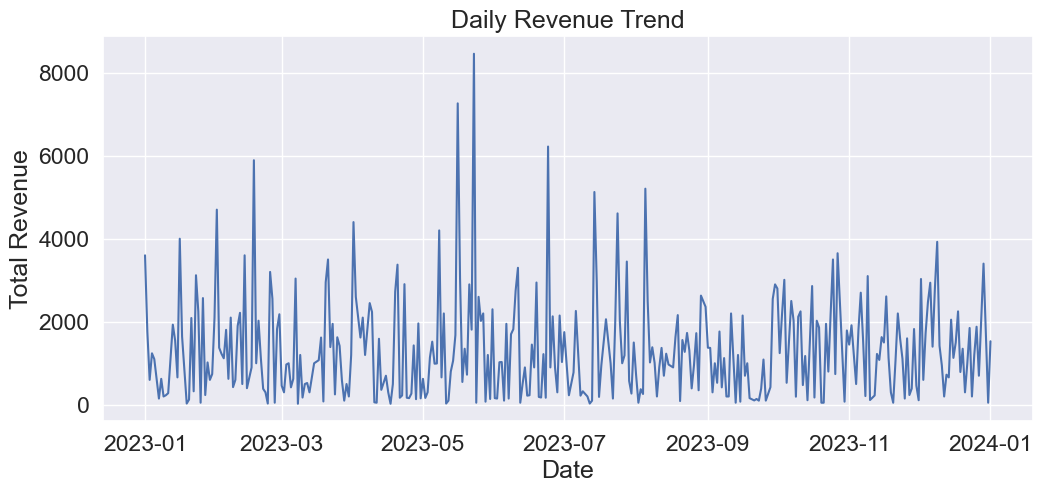

In [39]:
plt.figure(figsize=(12,5))
sns.lineplot(x=daily_revenue.index, y=daily_revenue.values)
plt.title("Daily Revenue Trend")
plt.xlabel("Date")
plt.ylabel("Total Revenue")
plt.show()

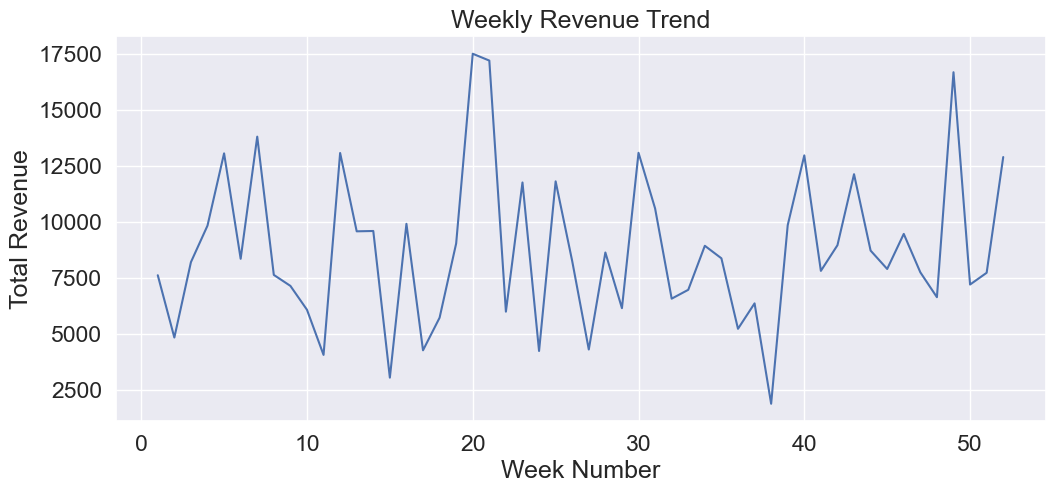

In [40]:
plt.figure(figsize=(12,5))
sns.lineplot(x=weekly_revenue.index, y=weekly_revenue.values)
plt.title("Weekly Revenue Trend")
plt.xlabel("Week Number")
plt.ylabel("Total Revenue")
plt.show()

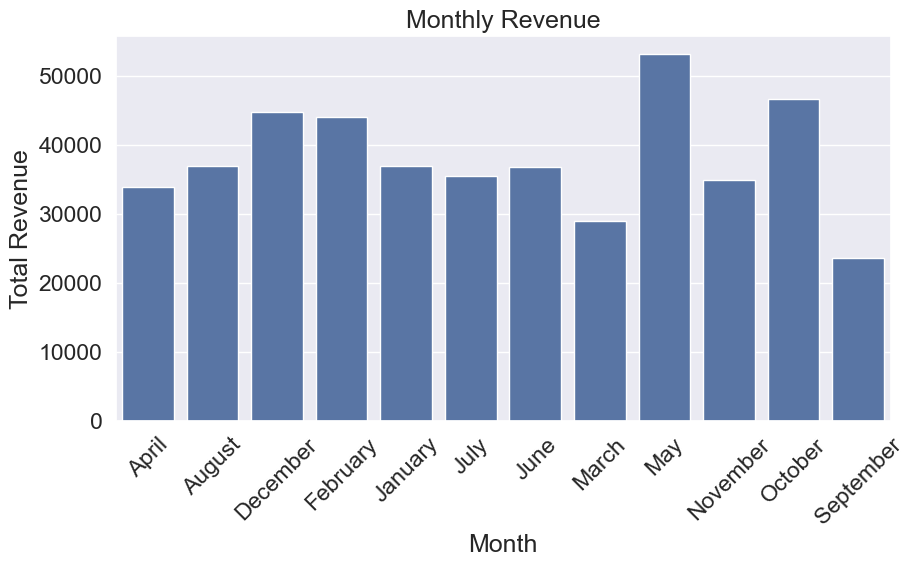

In [41]:
plt.figure(figsize=(10,5))
sns.barplot(x=monthly_revenue.index, y=monthly_revenue.values)
plt.title("Monthly Revenue")
plt.xlabel("Month")
plt.ylabel("Total Revenue")
plt.xticks(rotation=45)
plt.show()

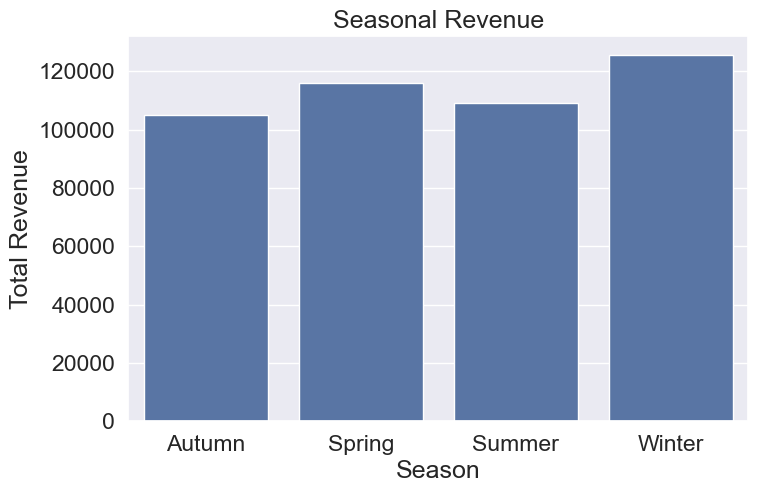

In [42]:
plt.figure(figsize=(8,5))
sns.barplot(x=season_revenue.index, y=season_revenue.values)
plt.title("Seasonal Revenue")
plt.xlabel("Season")
plt.ylabel("Total Revenue")
plt.show()

### Are there certain days of the week or times of the month when sales spike (e.g., payday effect)?

In [43]:
df['Date'] = pd.to_datetime(df['Date'])
df['Weekday'] = df['Date'].dt.day_name()
df['Day'] = df['Date'].dt.day

weekday_revenue = df.groupby('Weekday')['Total Amount'].sum()

day_revenue = df.groupby('Day')['Total Amount'].sum()

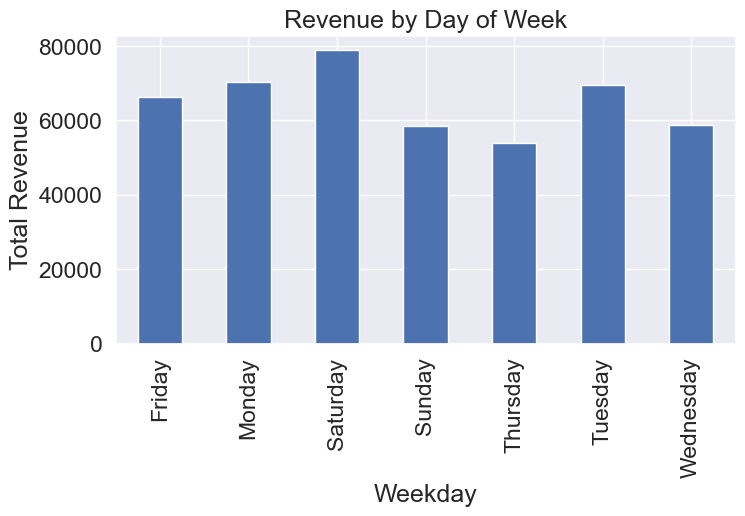

In [44]:
weekday_revenue.plot(kind='bar', figsize=(8,4), title='Revenue by Day of Week')
plt.ylabel('Total Revenue')
plt.show()

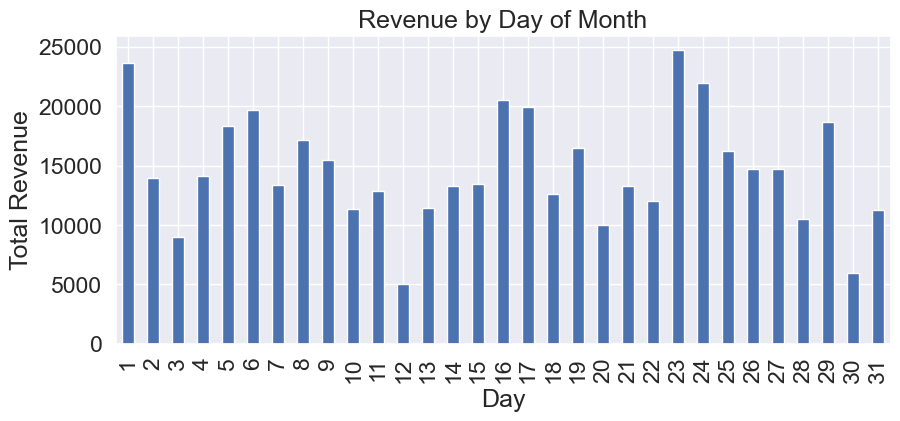

In [45]:
day_revenue.plot(kind='bar', figsize=(10,4), title='Revenue by Day of Month')
plt.ylabel('Total Revenue')
plt.show()

### Which product categories contribute the most to total revenue, and which contribute the least?

In [46]:
df.groupby('Product Category')['Total Amount'].sum()

Product Category
Beauty         143515
Clothing       155580
Electronics    156905
Name: Total Amount, dtype: int64

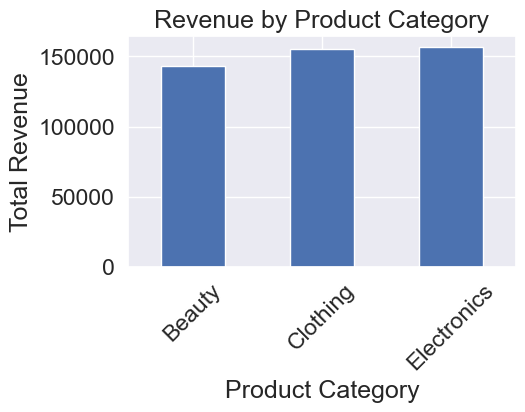

In [47]:
category_revenue=df.groupby('Product Category')['Total Amount'].sum()
category_revenue.plot(kind='bar', figsize=(5,3), title='Revenue by Product Category', rot=45)
    
plt.ylabel('Total Revenue')
plt.show()

### What is the distribution of high-ticket vs. low-ticket sales?

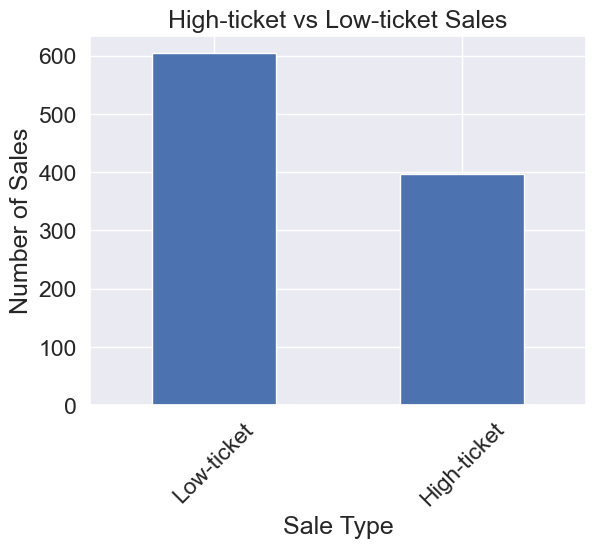

In [48]:
threshold = 200
df['Sale Type'] = ['Low-ticket' if x <= threshold else 'High-ticket' for x in df['Total Amount']]

df['Sale Type'].value_counts().plot(kind='bar', title='High-ticket vs Low-ticket Sales', rot=45)
plt.ylabel('Number of Sales')
plt.show()

### What is the average revenue per customer, and how does it vary across age groups?

Average revenue per customer: 456.0
Age Group
18-25    495.506757
26-35    480.390244
36-50    446.198083
50+      425.910543
Name: Total Amount, dtype: float64


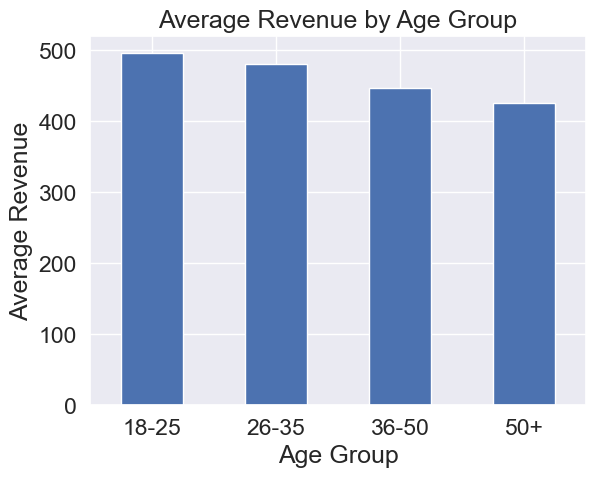

In [49]:
avg_revenue = df.groupby('Customer ID')['Total Amount'].sum().mean()
print("Average revenue per customer:", avg_revenue)

age_bins = [18,25,35,50,100]
age_group = ['18-25','26-35','36-50','50+']
df['Age Group'] = pd.cut(df['Age'], bins=age_bins, labels=age_group)

avg_by_age = df.groupby('Age Group')['Total Amount'].mean()
print(avg_by_age)

avg_by_age.plot(kind='bar', title='Average Revenue by Age Group', rot=0)
plt.ylabel('Average Revenue')
plt.show()

### Can we segment customers into groups (e.g., young-budget, mid-age-premium, seniors) based on their spending habits?

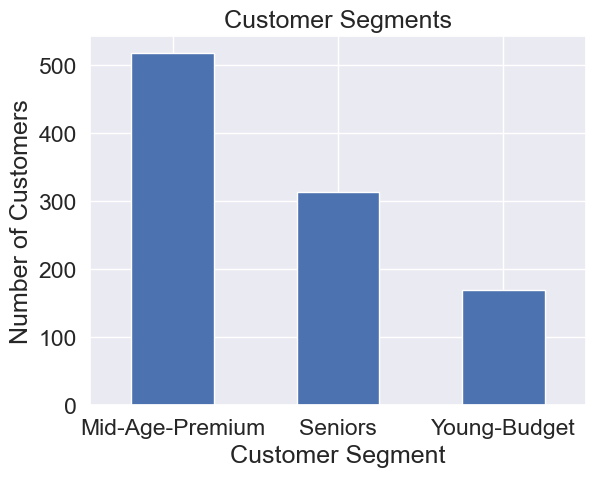

In [50]:
df['Customer Segment'] = ['Young-Budget' if x<=25 else 'Mid-Age-Premium' if x<=50 else 'Seniors' for x in df['Age']]
df['Customer Segment'].value_counts().plot(kind='bar', title='Customer Segments', rot=0)
plt.ylabel('Number of Customers')
plt.show()

### Who are the top 5% of customers contributing to revenue (Pareto Principle / 80-20 rule)?

In [51]:
cust_rev = df.groupby('Customer ID')['Total Amount'].sum().reset_index().sort_values('Total Amount', ascending=False)
cust_rev['Cumulative'] = cust_rev['Total Amount'].cumsum()
total_rev = cust_rev['Total Amount'].sum()
cust_rev['CumulativeShare'] = cust_rev['Cumulative'] / total_rev

top5pct = cust_rev.head(int(len(cust_rev)*0.05))
print("Top 5% customers (by count):", top5pct.shape[0])
display(top5pct)

top_80pct = cust_rev[cust_rev['CumulativeShare'] <= 0.8]
print("Customers contributing up to 80% revenue:", top_80pct.shape[0])


Top 5% customers (by count): 50


,Customer ID,Total Amount,Cumulative,CumulativeShare
487,CUST487,2000,2000,0.004386
476,CUST476,2000,4000,0.008772
773,CUST773,2000,6000,0.013158
503,CUST503,2000,8000,0.017544
92,CUST093,2000,10000,0.021930
88,CUST089,2000,12000,0.026316
946,CUST946,2000,14000,0.030702
157,CUST157,2000,16000,0.035088
155,CUST155,2000,18000,0.039474
420,CUST420,2000,20000,0.043860


Customers contributing up to 80% revenue: 301


### Which demographics are more likely to purchase from premium categories?

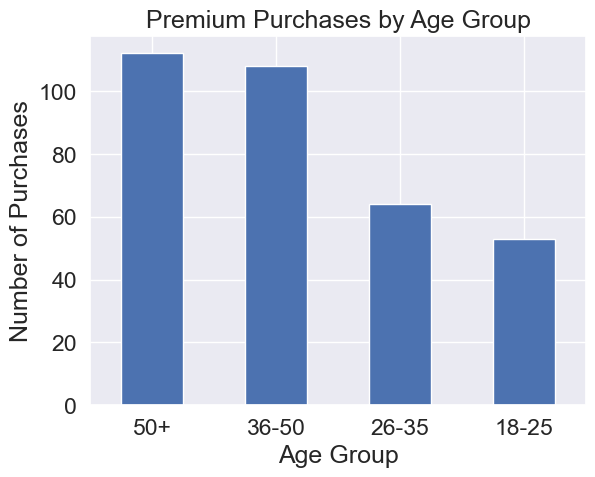

In [52]:
premium_customers = df[df['Product Category']=='Electronics']

premium_counts = premium_customers['Age Group'].value_counts()
premium_counts.plot(kind='bar', title='Premium Purchases by Age Group', rot=0)
plt.ylabel('Number of Purchases')
plt.show()

### Are certain product categories more popular among younger vs. older customers?

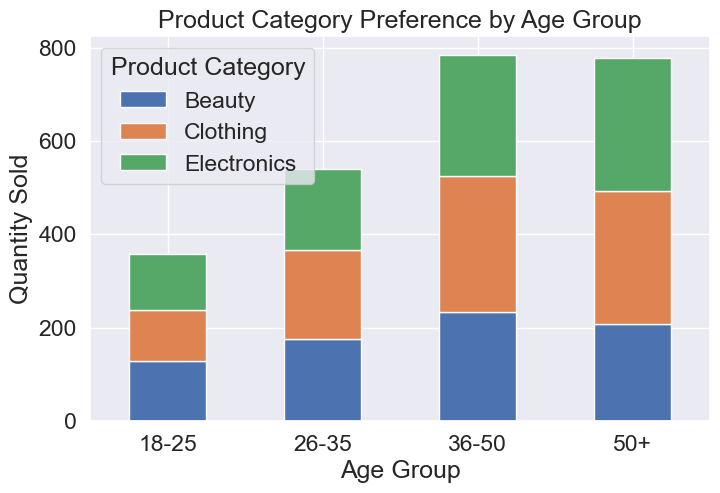

In [53]:
category_by_age = df.groupby(['Age Group','Product Category'])['Quantity'].sum().unstack()
category_by_age.plot(kind='bar', stacked=True, figsize=(8,5), title='Product Category Preference by Age Group', rot=0)
plt.ylabel('Quantity Sold')
plt.show() #stacked bar chart

### Do discounts or lower prices significantly increase sales volume in specific categories?

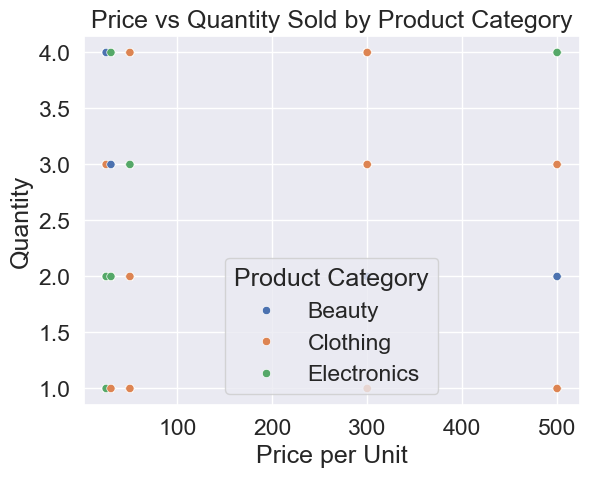

In [54]:
import seaborn as sns
sns.scatterplot(data=df, x='Price per Unit', y='Quantity', hue='Product Category')
plt.title('Price vs Quantity Sold by Product Category')
plt.show()

### How many unique customers purchase more than once, and what are their characteristics?

In [55]:
repeat_customers = df.groupby('Customer ID')['Transaction ID'].count()
repeat_customers = repeat_customers[repeat_customers>1]
print("Number of customers who purchased more than once:", len(repeat_customers))

Number of customers who purchased more than once: 0


### Do younger customers tend to try more categories compared to older customers (variety-seeking behavior)?

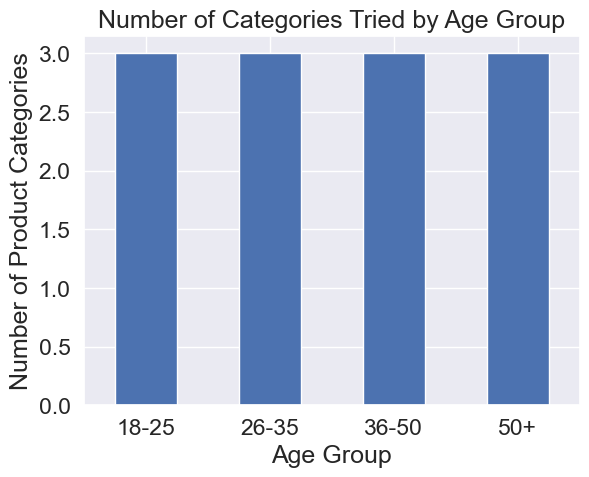

In [56]:
categories_by_age = df.groupby('Age Group')['Product Category'].nunique()
categories_by_age.plot(kind='bar', title='Number of Categories Tried by Age Group', rot=0)
plt.ylabel('Number of Product Categories')
plt.show()